## Part 2: Going Through My Scraped Data & Cleaning Them

This part is very straightforward, I will achieve the following things. 

* Provide a Data Dictionary
* Cleaning The Data
* Do a ittle EDA

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/scraped_articles_v2.csv')

df.shape

(4042, 4)

Seems like there is 4042 articles scaped, and 4 columns. Possibly a redudant column, because I only wanted 3 specific features.

In [4]:
df.head(3)

,Unnamed: 0,Title,Text,Source
0,0,Latest Headlines on CNN Business,Disney+ is almost near its subscribers goal fo...,https://edition.cnn.com/africa
1,1,Travel News - CNN,Here are all the animal livestreams and videos...,https://edition.cnn.com/africa
2,2,Rugby World Cup 2019,"By Daniel Gallan, for CNN\n\nNew Zealand ended...",https://edition.cnn.com/africa


#### Going to be doing some quick cleaning:
1. Drop the first column
2. Drop Duplicates

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df.head(2)

,Title,Text,Source
0,Latest Headlines on CNN Business,Disney+ is almost near its subscribers goal fo...,https://edition.cnn.com/africa
1,Travel News - CNN,Here are all the animal livestreams and videos...,https://edition.cnn.com/africa


In [25]:
#Droping duplicates, Because the webscraper can be buggy and duplicates twice
df = df.drop_duplicates(subset = 'Title', keep = 'first')

In [27]:
# Drop Duplicates on Text, because the webscraper could be buggy oce again
df = df.drop_duplicates(subset = 'Text', keep = 'first')

In [28]:
#Seems like I have 3256 Unique Articles scraped, this will be my corpus. 
df.shape

(3256, 3)

## Data Dictionary

**Title**: I wanted to keep the title of the news article, there could be some importance to this.

**Text**: This was a very important feature, because I needed this to perform future LDA Topic Modeling Analysis, K-Means, and possible DBSCAN to identify certain topics. In addition, before I enter all the modeling I will do some NLP pre-processing.

**Source** Very important, because I want to anlayze my results by the different source I was able to acquire.

#### I will now do some quick EDA anlaysis.

In [48]:
# To show full display of the output below
pd.options.display.max_rows = 4000
df.pivot_table(index=['Source'], aggfunc='size')

Source
CNN                                                   732
http://live.washingtonpost.com                          9
http://www.bbc.co.uk                                   18
http://www.bbc.com                                     26
http://www.cbc.ca                                      11
https://globalnews.ca                                  72
https://globalnews.ca/contests                          5
https://globalnews.ca/latest                            1
https://globalnews.ca/national                          1
https://globalnews.ca/trending-beta                     4
https://globalnews.ca/videos                           28
https://sec.theglobeandmail.com                         8
https://secure.politico.com                            90
https://slate.com                                      27
https://slate.com/business                             26
https://slate.com/commenting                            7
https://slate.com/culture                              18
https:/

There is a little bit moe cleaning to do, as you can see there seems to be many sources, however I only webscraped from a handful of websites, so let me clean up this column to have each element in source be its base url. 

In [ ]:
# WIll Need to use some Regex
# Map Functions, or list comprehensions to do this effieciently

In [51]:
#Simple Cleanup, Possibly a better way
df.loc[df['Source'].str.contains('cnn'), 'Source'] = 'CNN'
df.loc[df['Source'].str.contains('politico'), 'Source'] = 'Politico'
df.loc[df['Source'].str.contains('theglobeandmail'), 'Source'] = 'The Globe and Mail'
df.loc[df['Source'].str.contains('thestar'), 'Source'] = 'The Toronto Star'
df.loc[df['Source'].str.contains('washingtonpost'), 'Source'] = 'Washington Post'
df.loc[df['Source'].str.contains('bbc'), 'Source'] = 'BBC'
df.loc[df['Source'].str.contains('cbc'), 'Source'] = 'CBC'
df.loc[df['Source'].str.contains('gamespot'), 'Source'] = 'GameSpot'
df.loc[df['Source'].str.contains('slate'), 'Source'] = 'Slate'
df.loc[df['Source'].str.contains('breitbart'), 'Source'] = 'Breitbart'
df.loc[df['Source'].str.contains('thehill'), 'Source'] = 'The Hill'
df.loc[df['Source'].str.contains('globalnews'), 'Source'] = 'Globe News'
df.loc[df['Source'].str.contains('techcrunch'), 'Source'] = 'TechCrunch'
df.loc[df['Source'].str.contains('channelnewsasia'), 'Source'] = 'CNA'

In [52]:
df.pivot_table(index=['Source'], aggfunc='size')

Source
BBC                   150
Breitbart             411
CBC                   225
CNA                    74
CNN                   732
GameSpot               48
Globe News            111
Politico              179
Slate                  92
TechCrunch             19
The Globe and Mail    462
The Hill              193
The Toronto Star      425
Washington Post       135
dtype: int64

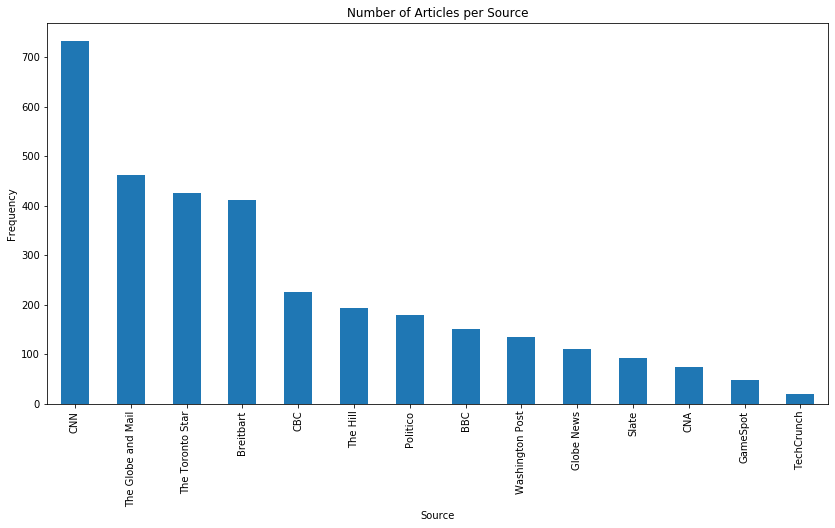

In [61]:
plt.figure(figsize=(14, 7))
ax = df['Source'].value_counts().plot(kind='bar',
                                    title="Number of Articles per Source")
ax.set_xlabel("Source")
ax.set_ylabel("Frequency")
plt.show()

Now that is cleaned up! We can identify that we were able to scrape a lot of articles from CNN, The Globe and Mail, The Toronto Star, and Breitbart. Some websites, it seems as if my scraper script didn't perform too well. That is okay, At least I got a dataset! 

In [62]:
df_final = df.copy()

In [63]:
df_final.to_csv('data/cleaned_df.csv')